In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.metrics as sklm
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

In [103]:
# Read the data line by line
with open('wage.data.txt', 'r') as file:
    lines = file.readlines()
# Extract column names from the first row
column_names = lines[0].split()
# Initialize an empty list to store properly formatted rows
formatted_rows = []
# Iterate over each line (excluding the first row) and format it
for line in lines[1:]:
    # Split the line by spaces
    line_data = line.split()
    # Remove any empty strings from the split
    line_data = [item for item in line_data if item]
    # Append the formatted row to the list
    formatted_rows.append(line_data)

# Convert the list of rows into a DataFrame
wage_data = pd.DataFrame(formatted_rows, columns=column_names)

# Print the first few rows of the DataFrame
print(wage_data.head())

  education south sex experience union  wage age race occupation sector marr
0         8     0   1         21     0   5.1  35    2          6      1    1
1         9     0   1         42     0  4.95  57    3          6      1    1
2        12     0   0          1     0  6.67  19    3          6      1    0
3        12     0   0          4     0     4  22    3          6      0    0
4        12     0   0         17     0   7.5  35    3          6      0    1


In [104]:
response_variable =  pd.to_numeric(wage_data['wage'], errors='coerce')
response_variable

0       5.10
1       4.95
2       6.67
3       4.00
4       7.50
       ...  
529    11.36
530     6.10
531    23.25
532    19.88
533    15.38
Name: wage, Length: 534, dtype: float64

In [105]:
new_wage_data = wage_data.drop(['wage'], axis=1)
new_wage_data.head()

,education,south,sex,experience,union,age,race,occupation,sector,marr
0,8,0,1,21,0,35,2,6,1,1
1,9,0,1,42,0,57,3,6,1,1
2,12,0,0,1,0,19,3,6,1,0
3,12,0,0,4,0,22,3,6,0,0
4,12,0,0,17,0,35,3,6,0,1


In [106]:
np.random.seed(5)
X_train, X_test, y_train, y_test = train_test_split(new_wage_data, response_variable, test_size = 0.10)

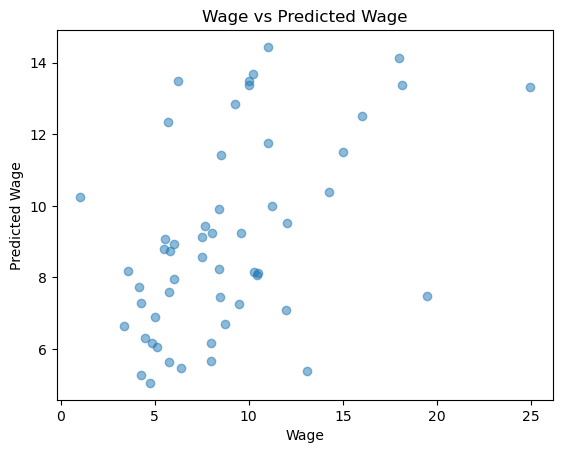

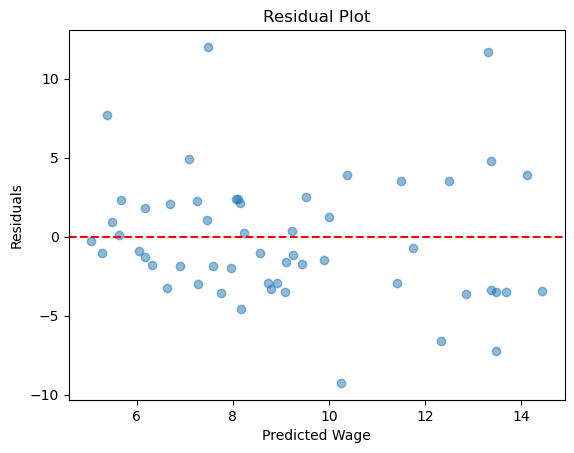

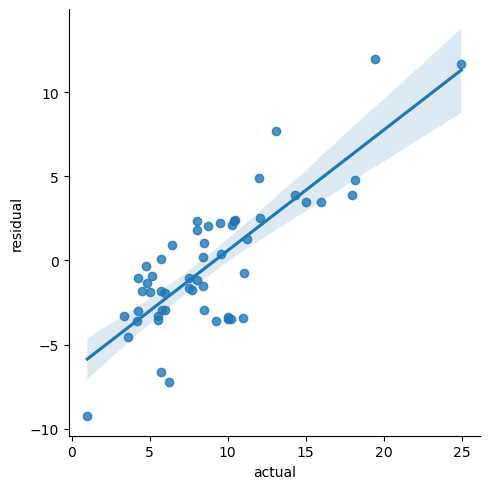

In [110]:
# Write your code here
linear_model = LinearRegression()
linear_model.fit(X_train, y_train);

# Predict housing prices on the test set
y_pred = linear_model.predict(X_test) 

# Plot predicted vs true wage
plt.scatter(y_test, y_pred, alpha=0.5) 
plt.xlabel("Wage") 
plt.ylabel("Predicted Wage") 
plt.title("Wage vs Predicted Wage")
plt.show()


residuals = y_test - y_pred
# Plot residuals vs predicted values
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Predicted Wage")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')  # Adding horizontal line at y=0 for reference
plt.show()

residuals = y_test - y_pred
residual_df = pd.DataFrame({'actual': y_test, 'predicted': y_pred, 'residual': residuals}) 
sns.lmplot(x='actual', y='residual', data=residual_df)


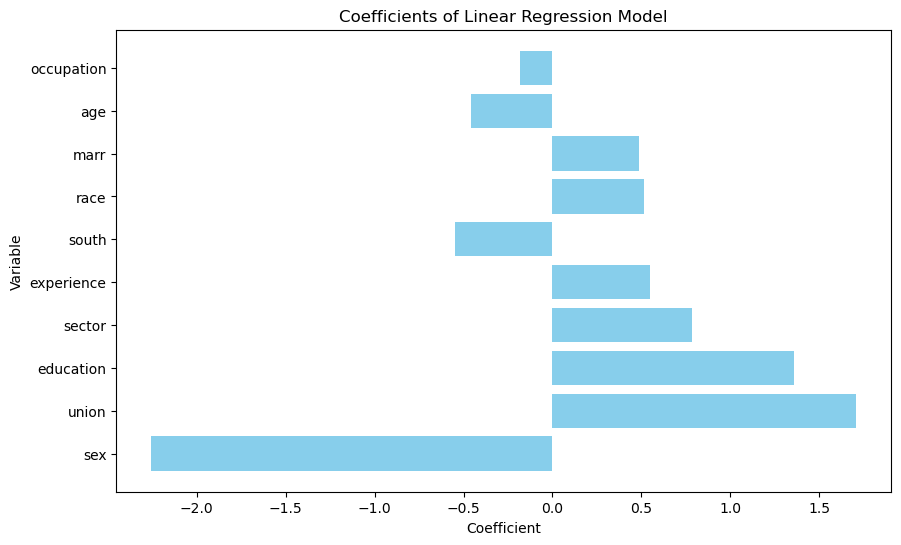

     Variable  Coefficient  Abs_Coefficient
2         sex    -2.254692         2.254692
4       union     1.705933         1.705933
0   education     1.360283         1.360283
8      sector     0.785577         0.785577
3  experience     0.549100         0.549100
1       south    -0.545478         0.545478
6        race     0.512754         0.512754
9        marr     0.488880         0.488880
5         age    -0.455970         0.455970
7  occupation    -0.179940         0.179940


In [111]:
#### Get the coefficients of the linear regression model
coefficients = pd.DataFrame({'Variable': X_train.columns, 'Coefficient': linear_model.coef_})
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()

# Sort coefficients by absolute value to identify most influential variables
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

# Plot coefficients to visualize the impact of each variable on wage
plt.figure(figsize=(10, 6))
plt.barh(coefficients['Variable'], coefficients['Coefficient'], color='skyblue')
plt.xlabel('Coefficient')
plt.ylabel('Variable')
plt.title('Coefficients of Linear Regression Model')
plt.show()

# Print coefficients to examine the impact of each variable
print(coefficients)

In [115]:
mse_linear = mean_squared_error(y_test, y_pred)
rmse_linear = np.sqrt(mse_ridge)
r2_linear = r2_score(y_test, y_pred)
mae_linear = mean_absolute_error(y_test, y_pred)

print("Linear Regression Metrics:")
print("Mean Squared Error:", mse_linear)
print("Root Mean Squared Error:", rmse_linear)
print("R-squared:", r2_linear)
print("Mean Absolute Error (MAE) for Linear Regression:", mae_linear)

Linear Regression Metrics:
Mean Squared Error: 15.914132542348977
Root Mean Squared Error: 3.9859274056360925
R-squared: 0.21105071807109743
Mean Absolute Error (MAE) for Linear Regression: 3.094502811575805


In [96]:
train_error = sklm.mean_squared_error(y_train, linear_model.predict(X_train))# SOLUTION
test_error = sklm.mean_squared_error(y_test, linear_model.predict(X_test)) # SOLUTION
print("Training MSE:", train_error)
print("Test MSE:", test_error)

Training MSE: 19.329035720020148
Test MSE: 15.914132542348977


In [117]:
# Instantiate Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate Ridge Regression model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print("Ridge Regression Metrics:")
print("Mean Squared Error:", mse_ridge)
print("Root Mean Squared Error:", rmse_ridge)
print("R-squared:", r2_ridge)
print("Mean Absolute Error (MAE) for Ridge Regression:", mae_ridge)

Ridge Regression Metrics:
Mean Squared Error: 15.887617283000871
Root Mean Squared Error: 3.9859274056360925
R-squared: 0.2123652223186383
Mean Absolute Error (MAE) for Ridge Regression: 3.090311833006255


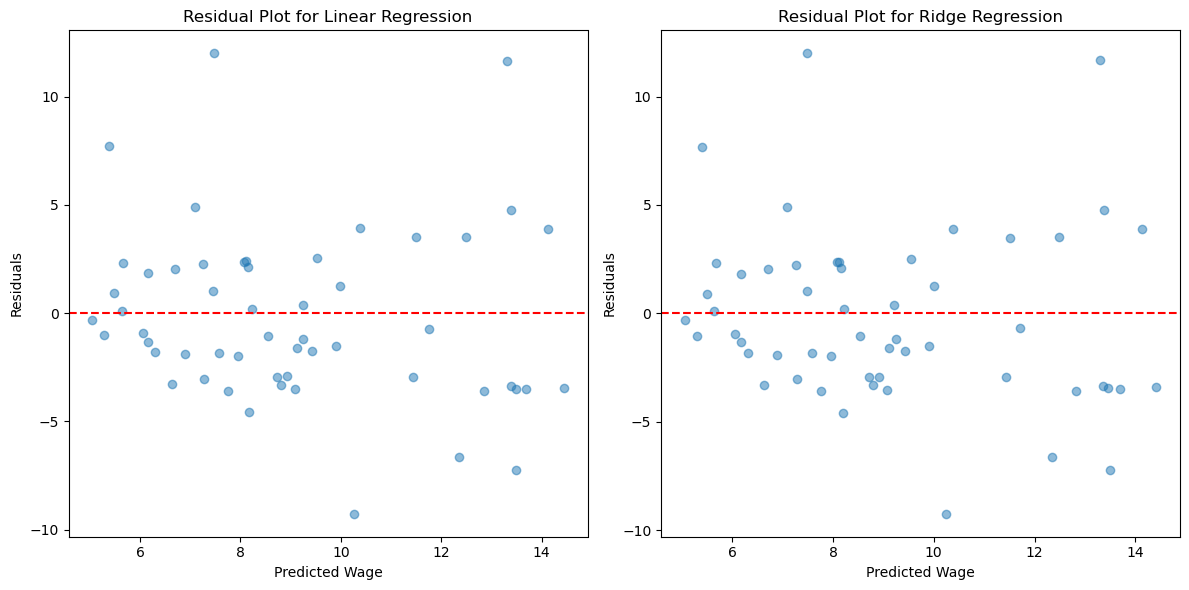

In [118]:
# Calculate residuals for Linear Regression
residuals_linear = y_test - y_pred

# Calculate residuals for Ridge Regression
residuals_ridge = y_test - y_pred_ridge

# Plot residual plots
plt.figure(figsize=(12, 6))

# Residual plot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals_linear, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for Linear Regression')
plt.xlabel('Predicted Wage')
plt.ylabel('Residuals')

# Residual plot for Ridge Regression
plt.subplot(1, 2, 2)
plt.scatter(y_pred_ridge, residuals_ridge, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for Ridge Regression')
plt.xlabel('Predicted Wage')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


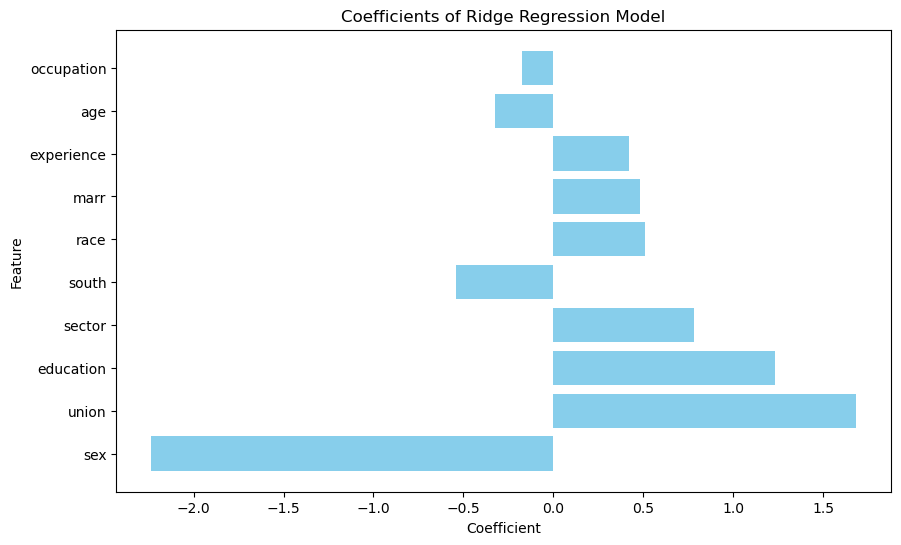

      Feature  Coefficient  Abs_Coefficient
2         sex    -2.234497         2.234497
4       union     1.681940         1.681940
0   education     1.231233         1.231233
8      sector     0.780358         0.780358
1       south    -0.542971         0.542971
6        race     0.509946         0.509946
9        marr     0.483877         0.483877
3  experience     0.419711         0.419711
5         age    -0.326554         0.326554
7  occupation    -0.176045         0.176045


In [101]:
# Extract coefficients from the Ridge Regression model
ridge_coefficients = ridge_model.coef_

# Create a DataFrame to store coefficients along with corresponding feature names
coefficients_df = pd.DataFrame({'Feature': new_wage_data.columns, 'Coefficient': ridge_coefficients})

# Sort coefficients by absolute value to identify most influential variables
coefficients_df['Abs_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Visualize coefficients
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Coefficients of Ridge Regression Model')
plt.show()

# Print coefficients to examine the impact of each variable
print(coefficients_df)
